# Analysis of E. Coli Data At Chicago Beaches 

#### Stephen Desilets

#### March 9, 2023

## 1. Introduction

Through this Exploratory Data Analysis Project, I explored the relationship between measurments characterizing various properties of Chiago beach water and measurements of the abundance of E. coli in Chicago beach water. 

From a public health perspective this project was important because the consequences associated with contracting E. coli can range anywhere from minor digestive tract symptoms to a life-threatening form of kidney failure (Mayo Clinic 2023).  By understanding the relationship between beach water conditions and the concentration of E. coli in Chicago Beach water, the Chicago Park District could advance public health by leveraging data to proactively prevent the public from contracting E. coli.  Given that the data related to water quality is automatically collected from sensors located at Chicago's beaches, if relationships existed between E. coli and beach water quality, then the Chicago Park District could leverage the automatically collected data to automatically issue beach swim advisories.  This operating model change could be a much more efficient (and less manual) way of issuing swim advisories and, as a consequence, could benefit public health and government cost-cutting efforts.

Since the Chicago Park District historically created an E. coli prediction model that they used to issue swim advisories to the public, my hypothesis is that the data will reveal relationships between beach water quality variables and E. coli measurements (City of Chicago 2023a). After all, it seems reasonable that the Chicago Park District would be using some of the water quality data as inputs into that E. coli prediction model, so I am optimistic that we will find some interesting relationships that could even help inform future public policy.

## 2. Data Explained

### 2.1 Data Sources

The two primary data sources that I intend to use for this project are:

* This dataset that aggregates data describing the water at various beaches in Chicago: https://data.cityofchicago.org/Parks-Recreation/Beach-Water-Quality-Automated-Sensors/qmqz-2xku (City of Chicago 2023b)

* This dataset that contains information about E. coli measurements at various beaches in Chicago: https://data.cityofchicago.org/Parks-Recreation/Beach-Lab-Data/2ivx-z93u (City of Chicago 2022).



### Data Cleaning

To navigate from these original datasets to a final sample dataset that could be leveraged for analysis, I had to conduct several cleaning exercises.  First, I merged the Beach Water Quality dataset and the Beach Lab dataset on timestamp and beach name.  Second, I checked whether there existed any duplicate rows after the merge (which there were not).  Third, I dropped several columns which would not be necessary for the analysis including, Transducer Depth, DNA Test ID, DNA Sample Timestamp, DNA Sample 1 Reading, DNA Sample 2 Reading, DNA Reading Mean, Culture Note, Culture Sample Interval, Culture Sample 2 Timestamp, Measurement Timestamp Label, Measurement Timestamp, Location, Measurement ID, Culture Test ID, Longitude, Latitude, and Battery Life. Fourth, I checked whether the dataframe had any rows of data with missing or inconsistent values and removed 6 rows, which had missing data that could not be imputed with a reasonable level of confidence.  Fifth, I added two variables (one Boolean variable and one indicator variable) to reflect whether the mean E. coli culture measurement would warrant a swim advisory.  The Chicago Park district prefers to issue swim advisories when the E. coli colony forming unit (CFU) measurements are greater than or equal to 235 CFU per 100 mL of water, so that was the cutoff utilized for determinging the value for these new Boolean and indicator variables (City of Chicago 2023a).

The population being represented by this data is the quality of the water at six Chicago beaches: 63rd Street Beach, Calumet Beach, Montrose Beach. Ohio Street Beach, Osterman Beach, and Rainbow Beach.

The total final sample size is 706 observations for which there existed simultaneous measurements of beach water quality and beach lab data. Though this sample was not randomly selected, I have no reason to believe that the sample of water measurement observations would differ significantly from the broader population of water measurement observations that would be theoretically possible (if one were to continuously measure the water at all times). Therefore, though I proceeded with caution, I remained optimistic about the ability of this analysis to result in useful insights about the relationship between E. coli and water quality at Chicago beaches.

### 2.2 Data Dictionary

Below, please find a data dictionary for the final dataset leveraged in this Exploratory Data Analysis project.



| Measure Name | Description | Source | Data Type | Number of Non-null Values
| --- | --- | --- | --- | --- |
| Beach Name | Name of Chicago beach where measurements occurred | Beach Water Quality Data | Object | 706 |
| Water Temperature | Water temperature in Celsius degrees | Beach Water Quality Data | Float | 706 |
| Turbidity | Water turbidity in Nephelometric Turbidity Units (NTU) | Beach Water Quality Data | Float | 706 |
| Wave Height | Wave height in meters | Beach Water Quality Data | Float | 706 |
| Wave Period | Wave period in seconds | Beach Water Quality Data | Float | 706 |
| Culture Sample 1 Reading | E. coli colony forming units (CFU) per 100 ml of water | Beach Lab Data | Float | 706 |
| Culture Sample 2 Reading | E. coli colony forming units (CFU) per 100 ml of water | Beach Lab Data | Float | 706 |
| Culture Reading Mean | The geometric mean of the culture sample 1 and 2 readings | Beach Lab Data | Float | 706 |
| Swim Advisory Warranted | Boolean variable indicating whether the Culture Reading Mean is greater than or equal to 235 CFU per 100 mL of water (and would therefore warrant a Swim Advisory from the Chicago Park District) | Created By Analyst During EDA Phase 1 | Boolean | 706 |
| Swim Advisory Warranted Indicator | Indicator variable indicating whether the Culture Reading Mean is greater than or equal to 235 CFU per 100 mL of water (and would therefore warrant a Swim Advisory from the Chicago Park District) | Created By Analyst After EDA Phase 2 | Integer | 706 |



## 3. Results

### 3.1 Import Data

First, I will import the Beach Water Quality dataset that was the output of the EDA Phase 2 report using the pandas module. Below, please find the dataset information, the dataset shape, the first five rows, and the last five rows of the dataset.

In [212]:
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

EDA_Final_Report_Input = pd.read_excel(r'EDA_Final_Report_Input.xlsx')

EDA_Final_Report_Input.info()
EDA_Final_Report_Input.shape
EDA_Final_Report_Input.head()
EDA_Final_Report_Input.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Beach Name                         706 non-null    object 
 1   Water Temperature                  706 non-null    float64
 2   Turbidity                          706 non-null    float64
 3   Wave Height                        706 non-null    float64
 4   Wave Period                        706 non-null    int64  
 5   Culture Sample 1 Reading           706 non-null    float64
 6   Culture Sample 2 Reading           706 non-null    float64
 7   Culture Reading Mean               706 non-null    float64
 8   Swim_Advisory_Warranted            706 non-null    bool   
 9   Swim Advisory Warranted Indicator  706 non-null    int64  
dtypes: bool(1), float64(6), int64(2), object(1)
memory usage: 50.5+ KB


(706, 10)

,Beach Name,Water Temperature,Turbidity,Wave Height,Wave Period,Culture Sample 1 Reading,Culture Sample 2 Reading,Culture Reading Mean,Swim_Advisory_Warranted,Swim Advisory Warranted Indicator
0,Osterman Beach,14.9,3.48,0.121,4,1.0,6.0,2.4,False,0
1,63rd Street Beach,16.4,1.75,0.170,3,11.0,7.0,8.8,False,0
2,63rd Street Beach,17.2,0.79,0.099,4,10.0,15.0,12.2,False,0
3,63rd Street Beach,17.3,0.62,0.126,5,727.0,365.0,515.1,True,1
4,63rd Street Beach,18.5,0.53,0.119,4,8.0,9.0,8.5,False,0


,Beach Name,Water Temperature,Turbidity,Wave Height,Wave Period,Culture Sample 1 Reading,Culture Sample 2 Reading,Culture Reading Mean,Swim_Advisory_Warranted,Swim Advisory Warranted Indicator
701,Rainbow Beach,21.0,0.20,0.126,4,14.0,16.0,15.0,False,0
702,Rainbow Beach,17.0,0.66,0.289,3,2420.0,2420.0,2420.0,True,1
703,Rainbow Beach,18.8,5.90,0.144,5,42.0,41.0,41.5,False,0
704,Rainbow Beach,18.7,1.24,0.133,8,16.0,21.0,18.3,False,0
705,Rainbow Beach,17.6,0.65,0.129,4,13.0,19.0,15.7,False,0


### 3.2 Analysis of Numerical Chicago Beach Water Dataset Variables via Histograms

I began this exploratory data analysis by constructing histograms of each of the quantitative variables of interest. By creating histograms using the water quality data, I obtained a better understanding of the shape, center, and spread of each of the variables' distributions, which was beneficial as I delved into subsequent analyses.

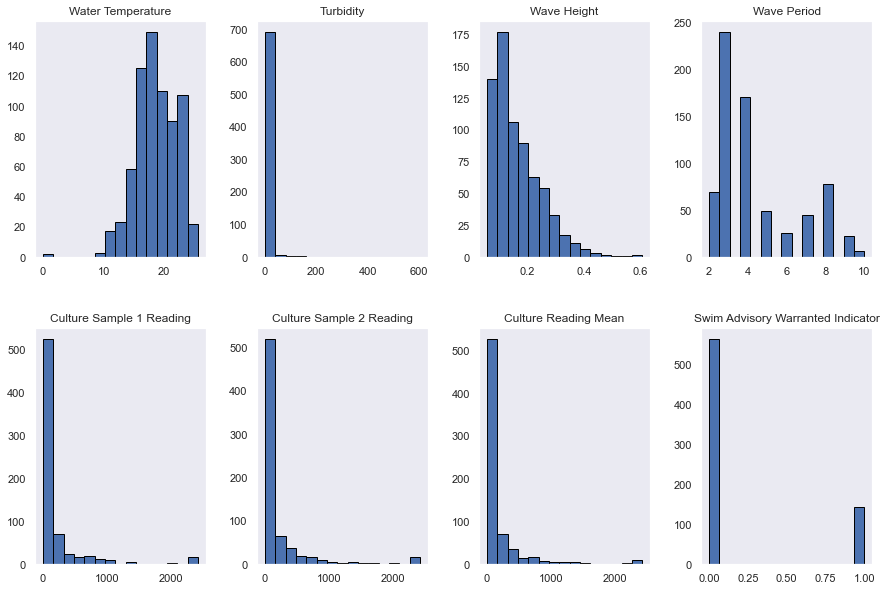

In [196]:
import seaborn as sns

import matplotlib.pyplot as plt

numerical_vars = ['Water Temperature', 'Turbidity', 'Wave Height', 'Wave Period', 
                  'Culture Sample 1 Reading', 'Culture Sample 2 Reading', 'Culture Reading Mean', 
                  'Swim Advisory Warranted Indicator']

histograms = EDA_Final_Report_Input[numerical_vars].hist(edgecolor = 'black', bins = 15, figsize = (15, 10), layout = (2,4), grid = False)

fig.tight_layout()


These histograms help to provide a clear picture into the distributions associated with each of the numerical variables in the beach water quality dataset. For example, we can see that the distributions of the variables related to water quality (including water temperature, turbidity, wave height, and wave period) are mostly skewed. The distributions for Culture Sample 1 Reading, Culuture Sample 2 Reading, and Culture Reading Mean are all strongly skewed right and look nearly identical to one another. Last, since the Swim Advisory Warranted Indicator variable is an indicator, that variable's distribution clusters around just two values - zero and one.

### 3.3 Analysis of Categorical Chicago Beach Water Dataset Variables via Barplots

I proceeded in the exploratory data analyses by creating barplots to display the distributions of all the categorical variables of interst in a dataset. This can helped me gain a better understanding of the categorical variable distributions in this dataset.

<AxesSubplot:title={'center':'Beach Name'}>

<AxesSubplot:title={'center':'Swim_Advisory_Warranted'}>

Text(0.5, 1.0, 'Barplot of Beach Lab and Water Quality Data Observations by Beach')

Text(0.5, 0, 'Beach Name')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Barplot of Beach Lab and Water Quality Data Observations by Swim Advisory Designation')

Text(0.5, 0, 'Swim Advisory Warranted Designation')

Text(0, 0.5, 'Count')

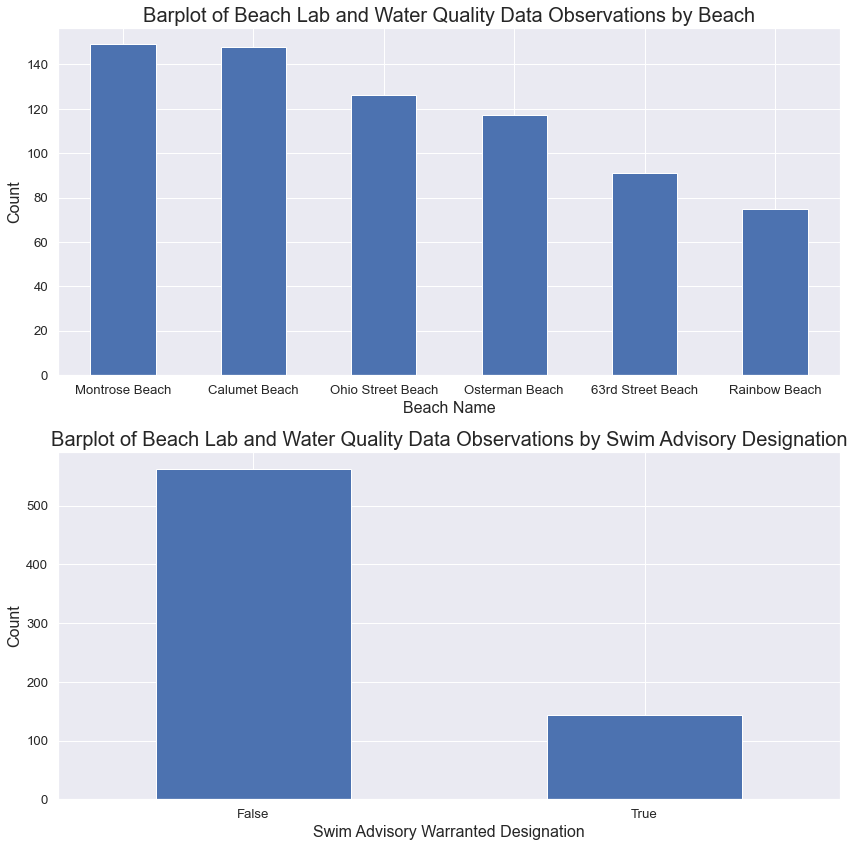

In [214]:
categorical_vars = ['Beach Name', 'Swim_Advisory_Warranted']

fig, ax = plt.subplots(2, 1, figsize = (12, 12))

for var, subplot in zip(categorical_vars, ax.flatten()):
    EDA_Final_Report_Input[var].value_counts().plot(kind = 'bar', ax = subplot, title = var, rot = 0)


ax[0].set_title("Barplot of Beach Lab and Water Quality Data Observations by Beach", fontsize = 20)
ax[0].set_xlabel('Beach Name', fontsize = 16)
ax[0].set_ylabel('Count', fontsize = 16)

ax[1].set_title("Barplot of Beach Lab and Water Quality Data Observations by Swim Advisory Designation", fontsize = 20)
ax[1].set_xlabel('Swim Advisory Warranted Designation', fontsize = 16)
ax[1].set_ylabel('Count', fontsize = 16)

fig.tight_layout()




These barplots provide a more clear understanding of the distributions of the two categorical variables in the Chicago beach water dataframe. The first barplot displays that the dataset contains a healthy sample size of over 70 observations for each of the six beaches in the dataframe. Furthermore, the second barplot displays that roughly 20% of the observations in the dataframe are associated with such unsafe levels of E. coli (as determined by the Culture Reading Mean exceeding 235 CFU per 100 mL of water) that they would warrant a swim advisory.

### 3.4 Analysis of Correlation Between Numeric Variables via Correlation Heatmaps

Constructing correlation heatmaps can be a powerful exercise for data scientists interested in identifying relationships between numerical variables in a dataset. Therefore, I constructed a correlation heatmap below in order to better understand the correlation between each of the numeric variables in the Chicago beach water dataframe.

<AxesSubplot:>

Text(0.5, 1.0, 'Correlation Between Numerical Variables For Chicago Beach Lab and Water Quality Data')

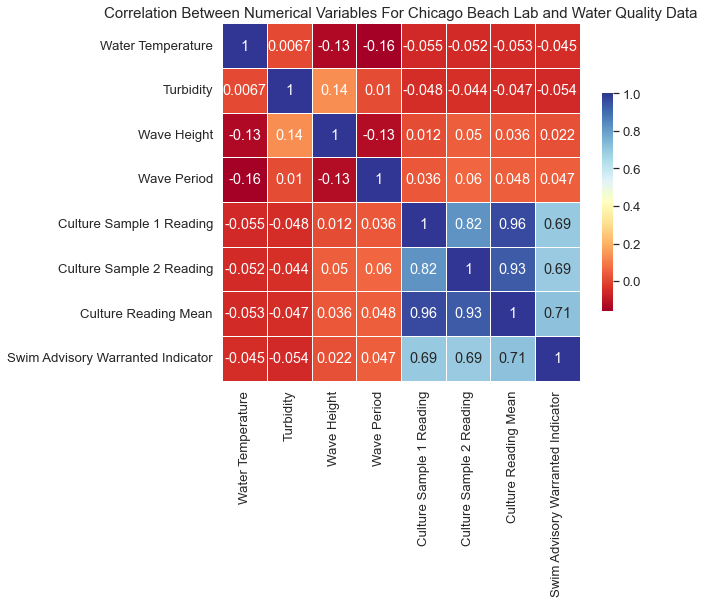

In [232]:
df_corr = EDA_Final_Report_Input[numerical_vars]
corrmat = df_corr.corr()

f, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(corrmat, vmax = 1, square = True, annot = True,
           cmap = 'RdYlBu', linewidths = 0.5,  cbar_kws={"shrink": 0.5})

ax.set_title('Correlation Between Numerical Variables For Chicago Beach Lab and Water Quality Data', fontsize = 15)


Two findings stand out when reading the above correlation heatmap.

First, the correlations between Culture Sample 1 Reading, Culture Sample 2 Reading, Culture Reading Mean, and Swim Advisory Warranted Indicator are all extremely high. This finding makes intuitive sense because the two culture readings were taken from the same beach at the same time, since the two individual culture readings were used to calculate the culture reading mean, and since the culture reading mean was used to calculate the swim advisory warranted indicator.  The fact that the Culture Reading Mean is so highly correlated with these two variables is great news for us as data scientists, since we can treat Culture Reading Mean as our primary outcome variable in this analysis moving forward.

Second, the correlation between culture reading mean and all of the other measures of beach water quality are nearly zero. This finding indicates that our measures of beach water quality that are automatically collected by sensors may not have particularly strong relationships with the concentration of E. coli in Chicago beach water.

### 3.5 Analysis of E. coli Measurements by Beach via Boxplots

I also constructed boxplots to analyze whether there appeared to be a relationship between the mean culture sample readings and the various beaches.

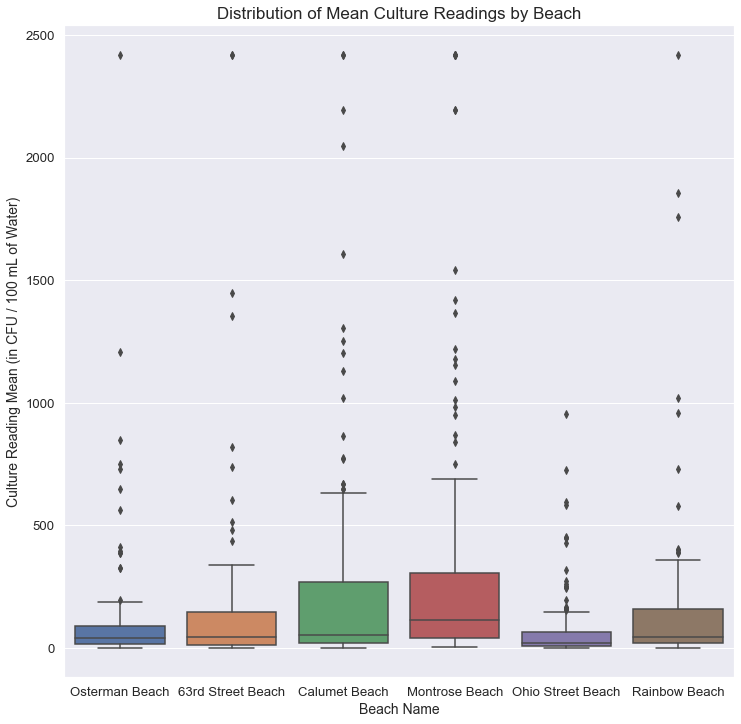

In [231]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 12

beach_boxplot = sns.boxplot(x = 'Beach Name', y = 'Culture Reading Mean', data = EDA_Final_Report_Input)
#plt.setp(beach_boxplot.get_xticklabels(), rotation=65)


plt.title('Distribution of Mean Culture Readings by Beach', fontsize=17)
plt.xlabel('Beach Name', fontsize=14);
plt.ylabel('Culture Reading Mean (in CFU / 100 mL of Water)', fontsize=14);

The boxplot pictured above indicates that there exists a bit of variation in the distribution of E. coli culture reading means across each of the six beaches in Chicago. For example, the third quartile of readings at the Ohio Street Beach is nearly the same as the first quartile of readings at Montrose Beach. While the variation is not particularly strong across the six beaches, this boxplot does seem to suggest that the overall distribution of mean E. coli culture readings may be the greatest at Montrose Beach.

### 3.6 Analysis of Correlation Between Numeric Variables for Montrose Beach Data via Correlation Heatmaps

Since the correlation heatmap using beach water quality data from all six of the Chicago beaches in the dataset revealed no strong relationships between beach water quality and mean E. coli culture readings, I tried to limit the scope of the analysis a bit moving forward, so that we could hopefully glean powerful insights - even if those insights only apply to a subset of our data. Accordingly, I examined whether there existed any strong relationships between beach water quality data and mean E. coli culture readings at Montrose Beach (the beach that tended to have the highest readings of E. coli in the dataset). To kickstart this analysis focused on Montrose Beach, I created a correlation heatmap using the numeric variables in the dataset. (This time, I didn't include the Culture Reading 1 and Culture Reading 2 values since I was mainly interested in the mean E. coli culture readings).

<AxesSubplot:>

Text(0.5, 1.0, 'Correlation Between Numerical Variables For Montrose Beach Lab and Water Quality Data')

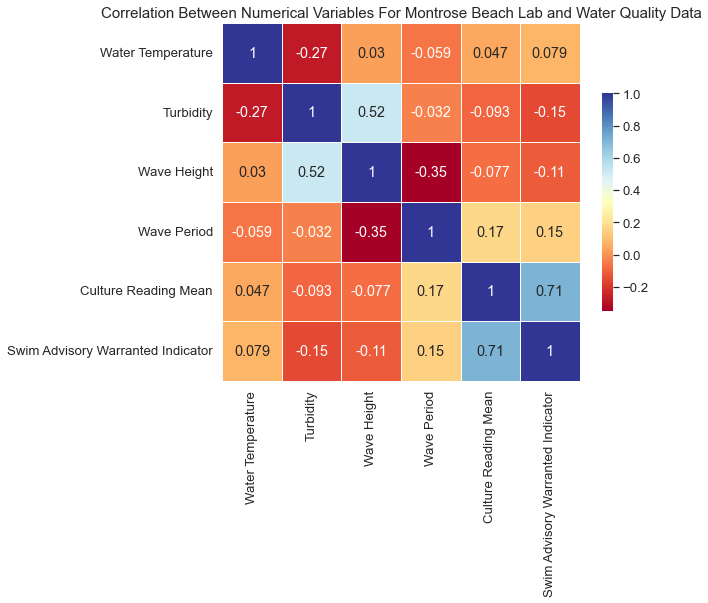

In [226]:
sns.set(font_scale=1.2)

Montrose = EDA_Final_Report_Input[EDA_Final_Report_Input["Beach Name"].isin(["Montrose Beach"])]

corr_vars_montrose = ['Water Temperature', 'Turbidity', 'Wave Height', 'Wave Period', 
                      'Culture Reading Mean', 'Swim Advisory Warranted Indicator']

df_corr_montrose = Montrose[corr_vars_montrose]
corrmat_montrose = df_corr_montrose.corr()

f, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(corrmat_montrose, vmax = 1, square = True, annot = True,
           cmap = 'RdYlBu', linewidths = 0.5, cbar_kws={"shrink": 0.5})

ax.set_title('Correlation Between Numerical Variables For Montrose Beach Lab and Water Quality Data', fontsize = 15)


Similar to the correlation heatmap that leveraged data for all six beaches, this correlation heatmap that solely includes Montrose Beach data reveals that there are not particularly strong relationships between mean E. coli culture readings and any of the beach water quality variables. In fact, the strongest correlation that Culture Reading Mean has with any of the other variables is 0.17 - with Wave Period. Though this correlation of 0.17 is not strong, it is still stronger than the correlation of 0.048 that Culture Reading Mean and Wave Period shared in the previous heatmap.

### 3.7 Analysis of the Relationship between Wave Period and Mean Culture Readings at Montrose Beach via Correlation Scatterplot

Since the strongest relationship identified in this dataset between Culture Reading Mean and any of the other beach water quality variables is Mean Culture Reading's relationship with Wave Period at Montrose Beach, I took a closer look at this relationship in a scatterplot below.

Text(1.0, 1.25, 'Scatterplot of Wave Period and Mean Culture Reading Data For Montrose Beach')

Text(0.5, 46.49999999999994, 'Wave Period (in seconds)')

Text(40.0, 0.5, 'Culture Reading Mean (in CFU / 100 mL of Water)')

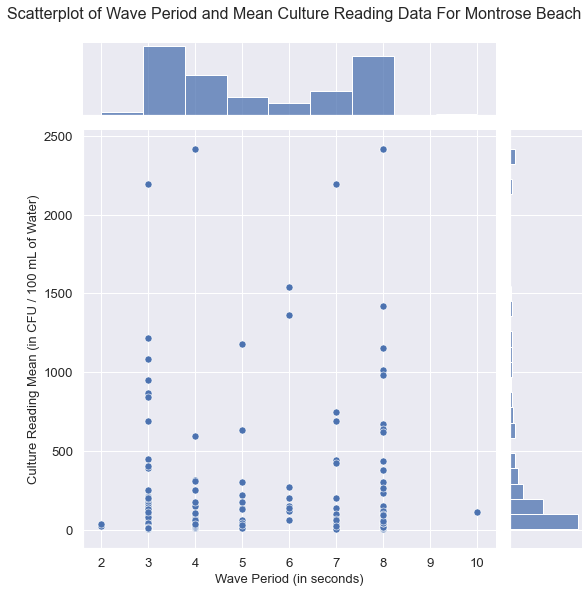

In [225]:
h = sns.jointplot(x='Wave Period', y='Culture Reading Mean', data = Montrose, height = 8, joint_kws={"s": 50});


#rcParams['figure.figsize'] = 20, 20

#sns.set(rc={'figure.figsize':(20, 20)})

plt.title('Scatterplot of Wave Period and Mean Culture Reading Data For Montrose Beach', y=1.25, fontsize = 16, loc = 'right')


# Set label for x-axis
#ax.set_xlabel( "Wave Period" , size = 20 )
  
# Set label for y-axis
#ax.set_ylabel( "Culture Reading Mean" , size = 20 )

h.ax_joint.set_xlabel('Wave Period (in seconds)', fontsize = 13)
h.ax_joint.set_ylabel('Culture Reading Mean (in CFU / 100 mL of Water)', fontsize = 13)


Two findings stand out in the scatterplot above of Culture Reading Mean and Wave Period data at Montrose Beach. First, the wave periods are clustered around integer values between 2 and 10, which is helpful for increasing our understanding of the shape of this distribution. Second, we see visually that the relationship between wave period and culture reading mean is not particularly strong (even if it is the strongest relationship that we have been able to identify in our dataset between E. coli measurements and beach water quality variables).

### 3.8 Sensitivity and Specificity Analysis via Receiving Operating Characteristic (ROC) Curve

If the Chicago Park District were interested in setting up a system where Beach Swim Advisories were automatically issued via beach water quality sensors, then based on the analysis above, the best option available might be to issue swim advisories based on wave period at Montrose Beach. Before setting up such a system, the Chicago Park District might be interested in knowing what the Receiving Operating Characteristic (ROC) Curve would look like for such a system given varying cutoffs for wave periods that determine the issuance of beach swim advisories. Below, I constructed and displayed what this ROC Curve would look like.

Text(0.5, 1.0, 'ROC Curve Using Wave Periods To Identify Unsafe Days at Montrose Beach')

Text(0.5, 0, 'Proportion of Safe Days Incorrectly Deemed Unsafe')

Text(0, 0.5, 'Proportion of Unsafe Days Correctly Deemed Unsafe')

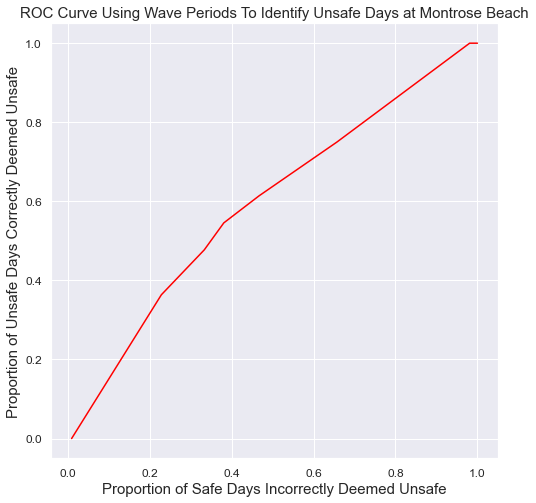

In [220]:
rcParams['figure.figsize'] = 8, 8

Unsafe_Days = Montrose[Montrose["Swim_Advisory_Warranted"].isin([True])]
Safe_Days = Montrose[Montrose["Swim_Advisory_Warranted"].isin([False])]

Unsafe_Days_Count = Unsafe_Days.shape[0]
Safe_Days_Count = Safe_Days.shape[0]

Period_Cutoff = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Cutoff_df = pd.DataFrame(Period_Cutoff, columns=['Period_Cutoff'])

Sensitivity_List = []
False_Positive_List = []


for pc in Cutoff_df['Period_Cutoff']:
    unsafe_count = (Unsafe_Days['Wave Period'] >= pc).sum()
    Sensitivity_List.append(unsafe_count / Unsafe_Days_Count)
    safe_count = (Safe_Days['Wave Period'] >= pc).sum()
    False_Positive_List.append(safe_count / Safe_Days_Count)

Cutoff_df['Sensitivity'] = Sensitivity_List
Cutoff_df['False Positive Rate'] = False_Positive_List

fig, ax = plt.subplots()
ax.plot(Cutoff_df['False Positive Rate'], Cutoff_df['Sensitivity'], 'red')
ax.set_title('ROC Curve Using Wave Periods To Identify Unsafe Days at Montrose Beach', fontsize = 15)
ax.set_xlabel('Proportion of Safe Days Incorrectly Deemed Unsafe', fontsize = 15)
ax.set_ylabel('Proportion of Unsafe Days Correctly Deemed Unsafe', fontsize = 15)


plt.tick_params(axis='both', which='major', labelsize=12)

The above ROC Curve, which reflects the effectiveness of using Wave Period data to issue Beach Swim Advisories at Montrose Beach, is nearly a straight line. The fact that this is a straight line reflects that Wave Period did not have a strong relationship with E. coli levels in the first place (given the correlation of 0.17 between wave period and mean culture reading at Montrose Beach). Furthermore, the straightness of this ROC curve reflects that there's not a clear cutoff for wave period that could be used that would clearly maximize sensitivity while minimizing the false positive rate.

## 4. Summary

Given that even the strongest available relationship between beach water quality and E. coli measurements (the relationship between wave period and mean culture readings at Montrose Beach) didn't even yield a promising ROC curve for the issuance of beach swim advisories, I would recommend that the Chicago Park District not pursue a system where beach swim advisories are automatically issued via beach water quality sensors.  Overall, the primary conclusion of this analysis is that Chicago Beach Water Quality conditions do not appear to have very strong relationships with measurements of concentrations of E. coli at Chicago beaches.  In that sense, our hypothesis that beach water quality data may be a good, automatically collected predictor for E. coli concentrations in Chicago beach water seems to be incorrect.

That said, if the Chicago Park District were interested in expanding the scope of this analysis further, then the Chicago Park District would have options for such pursuits.  For example, the Chicago Park District could research whether beach weather conditions (which are automatically collected via beach weather station sensors) are associated with E. coli concentrations in Chicago Beach Water (Chicago Park District 2023c).  While I was not able to incorporate this weather data into this analysis (since doing so would have reduced our sample size to just 43 observations), the Chicago Park District could collect further data to develop a strong sample size for such a potential future analysis.

## 5. References

City of Chicago. 2022. "Beach Lab Data." Chicago Data Portal. https://data.cityofchicago.org/Parks-Recreation/Beach-Lab-Data/2ivx-z93u

City of Chicago. 2023a. "Beach Swim Advisories." Chicago Data Portal. https://data.cityofchicago.org/Parks-Recreation/Beach-Swim-Advisories/t62e-8nvc

City of Chicago. 2023b. "Beach Water Quality - Automated Sensors." https://data.cityofchicago.org/Parks-Recreation/Beach-Water-Quality-Automated-Sensors/qmqz-2xku

City of Chicago. 2023c. "Beach Weather Stations - Automated Sensors." https://data.cityofchicago.org/Parks-Recreation/Beach-Weather-Stations-Automated-Sensors/k7hf-8y75

Mayo Clinic. 2023. "E. coli." https://www.mayoclinic.org/diseases-conditions/e-coli/symptoms-causes/syc-20372058
